<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [20]:
# you can write your code here

#Splitting the data to train, cv, test
import warnings 

warnings.filterwarnings("ignore") 

from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_cv,y_train,y_cv = train_test_split(x_tr,y_tr,test_size=0.25,random_state=42)

In [4]:
print(x_train.shape,x_cv.shape,x_test.shape)

(3000, 5) (1000, 5) (1000, 5)


In [5]:
#Initializing the model

model = SVC(gamma=0.001,C=100,random_state=42)
model.fit(x_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [6]:
model.support_vectors_.shape            #each support vector

(568, 5)

In [ ]:
# model.support_

In [7]:
model.dual_coef_.shape                  #alpha*yi

(1, 568)

In [8]:
def decision_function(x_cv,intercept,gamma,coef,sv):
  result = []
  
  for xq in x_cv:
    final = 0
    for j,s_v in enumerate(sv):                                                 #for every support vector
      final += coef[0][j]*np.exp(-gamma * np.linalg.norm(s_v - xq)**2)          # calculating the dual form including the RBF kernel
    result.append(final + intercept)                                            # adding the intercept
  return np.array(result)

In [9]:
dec_fn = decision_function(x_cv,model.intercept_,model.gamma,model.dual_coef_,model.support_vectors_)

In [10]:
np.array(dec_fn).ravel()[:10]

array([ 0.87725032, -1.11743611, -3.55849268, -0.63350034, -1.18015501,
       -1.26230537, -3.31529473, -2.41371053, -2.40420402, -1.40470136])

In [11]:
model.decision_function(x_cv)[:10]

array([ 0.87725032, -1.11743611, -3.55849268, -0.63350034, -1.18015501,
       -1.26230537, -3.31529473, -2.41371053, -2.40420402, -1.40470136])

It can be seen that, the values of the decision function model and that of manual implementation is same.

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [17]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    b = 0
    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    s = 1/(1+np.exp(z))

    return s

def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    temp = 0
   
    for i in range(y_true.shape[0]):
    
        temp1 = y_true[i]*np.log10(y_pred[i]) + (1-y_true[i]) * np.log10(1 - y_pred[i] ) 
        temp +=  temp1
    loss = -1 * temp/len(y_true)
    return loss

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    t1 = sigmoid(np.dot(x,w.T) + b)
    t2 = y - t1
    t3 = x*t2
    t4 = (alpha/N) * w
    dw = t3 - t4
    # dw = (x * ( y - sigmoid(np.dot(x,w.T) + b))) - (alpha/N) * w
    return dw

def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     t1 = sigmoid(np.dot(x,w.T) + b)
     db = (y - t1)#*t1*(1-t1)
     return db



##Calculating y+ and y-

In [ ]:
#  n_pos = y_cv.sum()
#  n_neg = len(y_cv) - n_pos 

In [12]:
 n_pos = y_train.sum()
 n_neg = len(y_train) - n_pos 

In [13]:
y_pos = (n_pos + 1)/(n_pos + 2)
y_neg = 1/(n_neg + 2)

In [33]:
y_pos,y_neg

(0.9989270386266095, 0.00048262548262548264)

In [14]:
y_cv_mod = np.where(y_cv == 0,y_neg,y_pos)

In [15]:
y_cv_mod.shape

(1000,)

In [16]:
dec_fn.shape

(1000, 1)

In [26]:
def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)

    w , b = initialize_weights(X_train[0])

    
    # global test_loss
    global train_loss 

# for every epoch
    for k in range(epochs):
        
        # for every data point(X_train,y_train)   # considering batch size = 1
        for j in range(len(X_train)):

            # a = np.random.choice(len(X_train))
           #compute gradient w.r.to w (call the gradient_dw() function)
            
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,len(X_train))
           #compute gradient w.r.to b (call the gradient_db() function)
            db = gradient_db(X_train[j],y_train[j],w,b)
           #update w, b
            w = w - eta0*dw
            b = b - eta0*db  

        # predict the output of x_train[for all data points in X_train] using w,b
       
        y = sigmoid(np.dot(X_train,w) + b) #+ eps
        #compute the loss between predicted and actual values (call the loss function)

        loss_train = logloss(y_train,y)
        # store all the train loss values in a list
        train_loss.append(loss_train)

        # predict the output of x_test[for all data points in X_test] using w,b
        # y_hat_pred = sigmoid(np.dot(X_test,w.T) + b)

        # #compute the loss between predicted and actual values (call the loss function)
        # loss_test = logloss(y_test,y_hat_pred)

        # # store all the test loss values in a list       
        # test_loss.append(loss_test)

        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
 
        if k!= 0:
          if round(train_loss[k],5) == round(train_loss[k-1],5):
            print(k)
            print('Minimum reached')
            return w,b            
               
    return w,b

In [27]:
# test_loss = []
train_loss = []
alpha=0.0001
eta0=0.0001
N=len(dec_fn)
epochs=50
w,b = train(dec_fn,y_cv_mod,epochs,alpha,eta0)                 # passing dec_fn(x_cv), y_cv_mod to SGD
print(w,b)

[-1.20811411] 0.14703437280888784


In [29]:
train_loss[:5]

[0.26080631808985716,
 0.23078175404393914,
 0.2079977730878358,
 0.19035277504215403,
 0.1764020677516202]

#Plot Epoch vs Loss


Text(0, 0.5, 'Loss')

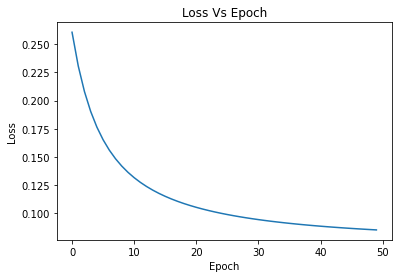

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(epochs),train_loss)
plt.title('Loss Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

##Calculating the probability value

In [ ]:
f_test = decision_function(x_test,model.intercept_,model.gamma,model.dual_coef_,model.support_vectors_)

In [ ]:
f_test[:7]

array([[-1.39679251],
       [-1.30546589],
       [-0.64799539],
       [-2.51319179],
       [-3.58985467],
       [ 0.76482695],
       [ 1.67435859]])

In [ ]:
y_prob = []

In [ ]:
for i in range(len(x_test)):
    p = 1/(1 + np.exp(-1*w[0]*f_test[i] + b))
    y_prob.append(p)

In [ ]:
y_prob[:7]

[array([0.00163271]),
 array([0.00267102]),
 array([0.0853637]),
 array([3.93505365e-06]),
 array([1.17352628e-08]),
 array([0.99482685]),
 array([0.99996176])]

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
